### 1.	Create a study guide for all the supervised learning models we have gone over. Include information about how the algorithms work, how they are evaluated, and any other information you deem necessary. Use your own words. Do NOT copy mine or that of articles we have read.

Supervised learning models learn relation between training dataset with their associated target variable and apply this relation to predict target variables to predict for future dataset.

There are two types of supervised learning. Classification and regrssion. If target variable does have value then it is classification model and if target variable is continuous number then it is regression.

Linear Regression : Linear regression is a linear approach to modelling the relationship between a scalar variable (target) and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression. If there are more than one variable then it is called multiple linear regression. 

### 2.	Do the same as question 1 except for unsupervised learning models. Something that is necessary for many models is determining number, so specify how you determine the number of clusters for example. Apply this concept to any other algorithms it is relevant for.

### 3.	Preprocess the customer data https://www.kaggle.com/carrie1/ecommerce-data . How are you handling nulls? What process(es) are you using to encode and normalize the data?

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv('../data.csv')

In [43]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [45]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [46]:
df = df.dropna(axis=0)

In [47]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [48]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [49]:
# labeling nominal values
from sklearn.preprocessing import LabelEncoder
class_labels = LabelEncoder()
df['Country']=class_labels.fit_transform(df['Country'].values)
df['Description']=class_labels.fit_transform(df['Description'].values)
df

<ipython-input-49-2d36dc14caec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country']=class_labels.fit_transform(df['Country'].values)
<ipython-input-49-2d36dc14caec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Description']=class_labels.fit_transform(df['Description'].values)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,3716,6,12/1/2010 8:26,2.55,17850.0,35
1,536365,71053,3724,6,12/1/2010 8:26,3.39,17850.0,35
2,536365,84406B,861,8,12/1/2010 8:26,2.75,17850.0,35
3,536365,84029G,1813,6,12/1/2010 8:26,3.39,17850.0,35
4,536365,84029E,2776,6,12/1/2010 8:26,3.39,17850.0,35
...,...,...,...,...,...,...,...,...
541904,581587,22613,2263,12,12/9/2011 12:50,0.85,12680.0,13
541905,581587,22899,695,6,12/9/2011 12:50,2.10,12680.0,13
541906,581587,23254,701,4,12/9/2011 12:50,4.15,12680.0,13
541907,581587,23255,700,4,12/9/2011 12:50,4.15,12680.0,13


In [50]:
df['Description'].value_counts()

3716    2070
2780    1905
1771    1662
217     1418
2355    1416
        ... 
1232       1
1230       1
2875       1
1229       1
1413       1
Name: Description, Length: 3896, dtype: int64

In [51]:
df = df.drop(['InvoiceNo','StockCode','InvoiceDate'],axis=1)

In [52]:
cor_mat = df.corr()
cor_mat

,Description,Quantity,UnitPrice,CustomerID,Country
Description,1.000000,0.000174,-0.000127,-0.004231,-0.013817
Quantity,0.000174,1.000000,-0.001238,-0.003600,-0.009414
UnitPrice,-0.000127,-0.001238,1.000000,-0.004560,-0.005851
CustomerID,-0.004231,-0.003600,-0.004560,1.000000,0.388294
Country,-0.013817,-0.009414,-0.005851,0.388294,1.000000


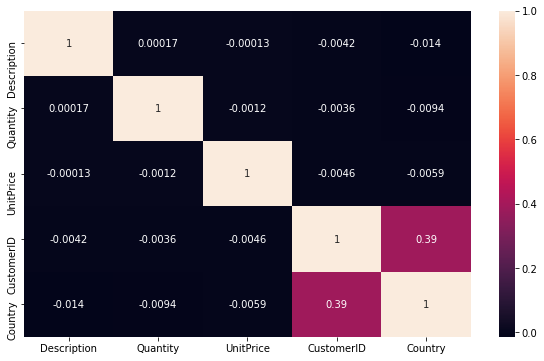

In [53]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cor_mat,annot=True)
plt.show()


In [54]:
# Changing all values of columns to float
df = df.astype(np.float)

In [55]:
df

,Description,Quantity,UnitPrice,CustomerID,Country
0,3716.0,6.0,2.55,17850.0,35.0
1,3724.0,6.0,3.39,17850.0,35.0
2,861.0,8.0,2.75,17850.0,35.0
3,1813.0,6.0,3.39,17850.0,35.0
4,2776.0,6.0,3.39,17850.0,35.0
...,...,...,...,...,...
541904,2263.0,12.0,0.85,12680.0,13.0
541905,695.0,6.0,2.10,12680.0,13.0
541906,701.0,4.0,4.15,12680.0,13.0
541907,700.0,4.0,4.15,12680.0,13.0


In [56]:
df.var()

Description    1.186307e+06
Quantity       6.184839e+04
UnitPrice      4.804592e+03
CustomerID     2.936426e+06
Country        4.540825e+01
dtype: float64

In [57]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()

#df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [58]:
df['Amount'] = df['Quantity']*df['UnitPrice']

In [59]:
df

,Description,Quantity,UnitPrice,CustomerID,Country,Amount
0,3716.0,6.0,2.55,17850.0,35.0,15.30
1,3724.0,6.0,3.39,17850.0,35.0,20.34
2,861.0,8.0,2.75,17850.0,35.0,22.00
3,1813.0,6.0,3.39,17850.0,35.0,20.34
4,2776.0,6.0,3.39,17850.0,35.0,20.34
...,...,...,...,...,...,...
541904,2263.0,12.0,0.85,12680.0,13.0,10.20
541905,695.0,6.0,2.10,12680.0,13.0,12.60
541906,701.0,4.0,4.15,12680.0,13.0,16.60
541907,700.0,4.0,4.15,12680.0,13.0,16.60


In [60]:
df['CustomerID'].value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
13829.0       1
16148.0       1
15668.0       1
15590.0       1
13703.0       1
Name: CustomerID, Length: 4372, dtype: int64

### 4.	Perform k-means on this dataset for customer segments. Customer segments help determine what types of people buy your product, which allows you to target more people like your usual customers. Should you look at all the data, or which subset of data should you use? What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?

In [61]:
X = df.drop('CustomerID',axis=1)
y = df['CustomerID']

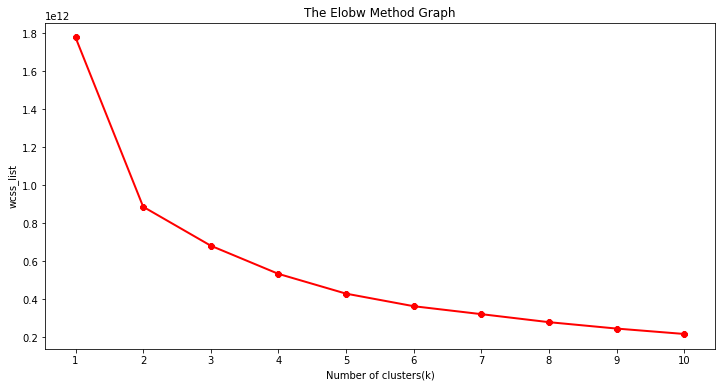

In [62]:
from sklearn.cluster import KMeans  

#Initializing the list for the values of WCSS  
wcss_list= []  
 
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(df)  
    wcss_list.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.plot(range(1, 11), wcss_list, linewidth=2, color="red", marker ="8") 
plt.title('The Elobw Method Graph')
plt.xticks(np.arange(1,11,1))
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [63]:
#training model
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df)

print(y_kmeans)


[0 0 0 ... 2 2 2]


In [35]:
#visualising clusters
plt.scatter(df[y_kmeans == 0, 0], df[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(df[y_kmeans == 1, 0], df[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

TypeError: '(array([False, False, False, ...,  True,  True,  True]), 0)' is an invalid key

### 5.	Perform hierarchical clustering for customer segments. What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?

In [64]:
from scipy.cluster.hierarchy import linkage, dendrogram

linked = linkage(X,'ward')
plt.figure(figsize=(10,7))

dendro = dendrogram(linked, labels=list(y))
plt.xticks(rotation=90)
plt.show()


MemoryError: Unable to allocate 617. GiB for an array with shape (82754714206,) and data type float64

### 6.	Compare the results of 4 and 5. Which approach do you think is best? Why? 

In [ ]:
#Making a new df with only transactions coming from the UK
UK_df = commerce_no_nan.copy(deep = True)
UK_df = UK_df[UK_df['Country'] == 'United Kingdom']

#Viewing the head of the dataframe
UK_df.head()


In [ ]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(grouped_customerid.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()
